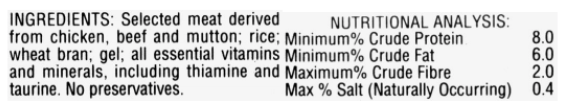

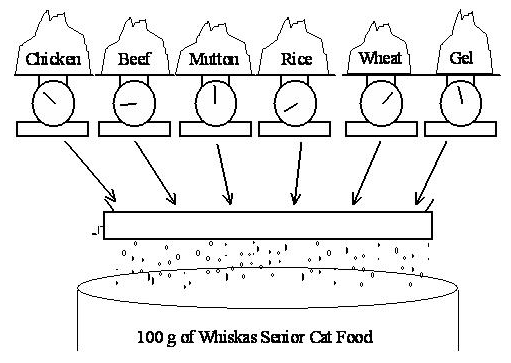

- The costs of the **chicken, beef, and mutton** are \<span class="mark">$0.013, \$0.008 and \$0.010</span> respectively, 

- While the costs of the **rice, wheat and gel** are \<span class="mark">$0.002, \$0.005 and \$0.001</span> respectively. 

(All costs are per gram.) For this exercise we will ignore the vitamin and mineral ingredients. (Any costs for these are likely to be very small anyway.)



Each ingredient contributes to the total weight of protein, fat, fibre and salt in the final product. The contributions (in grams) per gram of ingredient are given in the table below.

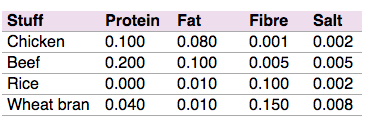

- First we will consider a simplified problem to build a simple Python model.

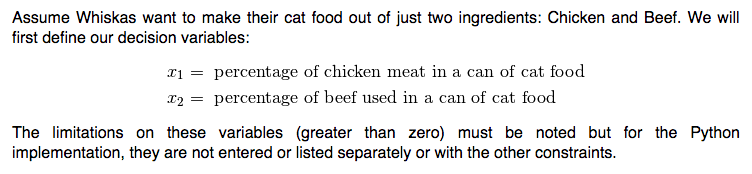

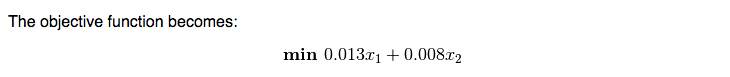

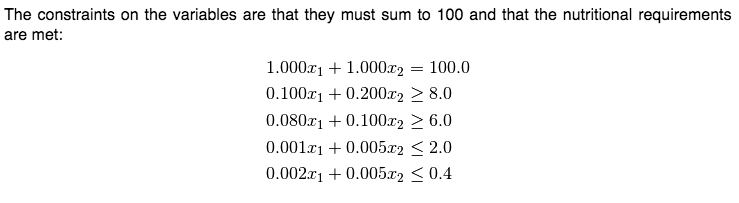

In [20]:
# Import PuLP modeler functions
from pulp import *

In [21]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Whiskas Problem",LpMinimize)

In [22]:
# The 2 variables Beef and Chicken are created with a lower limit of zero
x1=LpVariable("ChickenPercent",0,None,LpInteger)
x2=LpVariable("BeefPercent",0)

In [23]:
# The objective function is added to 'prob' first
prob += 0.013*x1 + 0.008*x2, "Total Cost of Ingredients per can"

In [24]:
# The five constraints are entered
prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100*x1 + 0.200*x2 >= 8.0, "ProteinRequirement"
prob += 0.080*x1 + 0.100*x2 >= 6.0, "FatRequirement"
prob += 0.001*x1 + 0.005*x2 <= 2.0, "FibreRequirement"
prob += 0.002*x1 + 0.005*x2 <= 0.4, "SaltRequirement"

In [25]:
# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")


In [26]:
# The problem is solved using PuLP's choice of Solver
prob.solve()


1

In [27]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [28]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

BeefPercent = 66.0
ChickenPercent = 34.0


In [29]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", value(prob.objective))

Total Cost of Ingredients per can =  0.97


- The output to show that Chicken will make up 33.33%, Beef will make up 66.67% 

- The Total cost of ingredients per can is 96 cents.

In [36]:
# Creates a list of the Ingredients
Ingredients = ['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL']

# A dictionary of the costs of each of the Ingredients is created
costs = {'CHICKEN': 0.013, 
         'BEEF': 0.008, 
         'MUTTON': 0.010, 
         'RICE': 0.002, 
         'WHEAT': 0.005, 
         'GEL': 0.001}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {'CHICKEN': 0.100, 
                  'BEEF': 0.200, 
                  'MUTTON': 0.150, 
                  'RICE': 0.000, 
                  'WHEAT': 0.040, 
                  'GEL': 0.000}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {'CHICKEN': 0.080, 
              'BEEF': 0.100, 
              'MUTTON': 0.110, 
              'RICE': 0.010, 
              'WHEAT': 0.010, 
              'GEL': 0.000}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {'CHICKEN': 0.001, 
                'BEEF': 0.005, 
                'MUTTON': 0.003, 
                'RICE': 0.100, 
                'WHEAT': 0.150, 
                'GEL': 0.000}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {'CHICKEN': 0.002, 
               'BEEF': 0.005, 
               'MUTTON': 0.007, 
               'RICE': 0.002, 
               'WHEAT': 0.008, 
               'GEL': 0.000}

In [37]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Whiskas Problem", LpMinimize)

In [38]:
# A dictionary called 'ingredient_vars' is created to contain the referenced Variables
ingredient_vars = LpVariable.dicts("Ingr",Ingredients,0)

In [39]:
# The objective function is added to 'prob' first
prob += lpSum([costs[i]*ingredient_vars[i] for i in Ingredients]), "Total Cost of Ingredients per can"

In [40]:
# The five constraints are added to 'prob'
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0, "ProteinRequirement"
prob += lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0, "FatRequirement"
prob += lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0, "FibreRequirement"
prob += lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4, "SaltRequirement"

In [45]:
# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")

In [41]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [42]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [43]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Ingr_BEEF = 60.0
Ingr_CHICKEN = 0.0
Ingr_GEL = 40.0
Ingr_MUTTON = 0.0
Ingr_RICE = 0.0
Ingr_WHEAT = 0.0


In [44]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", value(prob.objective))

Total Cost of Ingredients per can =  0.52


In [2]:
"""
Example problem file that solves the whiskas blending problem
"""
import pulp


In [15]:
dict(zip(ingredients, [0.013, 0.008, 0.010, 0.002, 0.005, 0.001]))

{'beef': 0.008,
 'chicken': 0.013,
 'gel': 0.001,
 'mutton': 0.01,
 'rice': 0.002,
 'wheat': 0.005}

In [12]:
# initialise the model
whiskas_model = pulp.LpProblem('The Whiskas Problem', pulp.LpMinimize)
# make a list of ingredients
ingredients = ['chicken', 'beef', 'mutton', 'rice', 'wheat', 'gel']
# create a dictionary of pulp variables with keys from ingredients
# the default lower bound is -inf
x = pulp.LpVariable.dict('x_ % s', ingredients, lowBound=0)
# cost data
cost = dict(zip(ingredients, [0.013, 0.008, 0.010, 0.002, 0.005, 0.001]))
# create the objective
whiskas_model += sum([cost[i] * x[i] for i in ingredients])

In [13]:
# ingredient parameters
protein = dict(list(zip(ingredients, [0.100, 0.200, 0.150, 0.000, 0.040, 0.000])))
fat = dict(list(zip(ingredients, [0.080, 0.100, 0.110, 0.010, 0.010, 0.000])))
fibre = dict(list(zip(ingredients, [0.001, 0.005, 0.003, 0.100, 0.150, 0.000])))
salt = dict(list(zip(ingredients, [0.002, 0.005, 0.007, 0.002, 0.008, 0.000])))
  # note these are constraints and not an objective as there is a equality/inequality
whiskas_model += sum([protein[i] * x[i] for i in ingredients]) >= 8.0
whiskas_model += sum([fat[i] * x[i] for i in ingredients]) >= 6.0
whiskas_model += sum([fibre[i] * x[i] for i in ingredients]) <= 2.0
whiskas_model += sum([salt[i] * x[i] for i in ingredients]) <= 0.4

In [14]:
# problem is then solved with the default solver
whiskas_model.solve()
# print the result

for ingredient in ingredients:
    print('The mass of % s is % s grams per can' % (ingredient,x[ingredient].value()))

The mass of chicken is 0.0 grams per can
The mass of beef is 60.0 grams per can
The mass of mutton is 0.0 grams per can
The mass of rice is 0.0 grams per can
The mass of wheat is 0.0 grams per can
The mass of gel is 0.0 grams per can
